# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [81]:
df = pd.read_csv('train.csv')

In [82]:
print('Max:    ' + str(df['crim'].max()))
print('Min:    ' + str(df['crim'].min()))
print('Mean:   ' + str(df['crim'].mean()))
print('Median: ' + str(df['crim'].median()))
print()
print('Average Crime Per Capita for Cities By Charles River:     ' + str(df.loc[df['chas'] == 1]['crim'].mean()))
print('Average Crime Per Capita for Cities not by Charles River: ' + str(df.loc[df['chas'] == 0]['crim'].mean()))

Max:    73.5341
Min:    0.00632
Mean:   3.360341471471471
Median: 0.26169000000000003

Average Crime Per Capita for Cities By Charles River:     2.1639725
Average Crime Per Capita for Cities not by Charles River: 3.436786773162939


In [88]:
df['Bk'] = df['b'].map(lambda x: ((x / 1000) ** 0.5 + 0.63))
#df = df.drop('Bk', axis = 1)
df.head()
#df['Bk'].describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Bk
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.260000
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.260000
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.258196
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.260000
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1.258967


In [89]:
by_river = df.loc[df['chas'] == 1]
away_river = df.loc[df['chas'] == 0]

In [90]:
rad_split = [df.loc[df['rad'] == i] for i in df['rad'].unique()]
print('Average Property Value by Accesibility to Highway')
for i,j in zip(rad_split, df['rad'].unique()):
    print(str(j) + ': ' +  str(i['medv'].mean()))


Average Property Value by Accesibility to Highway
1: 25.935714285714283
2: 22.25714285714286
3: 28.8962962962963
5: 26.013157894736842
4: 20.93857142857142
8: 30.566666666666663
6: 20.707692307692312
7: 28.0
24: 17.056818181818183


<IPython.core.display.Javascript object>


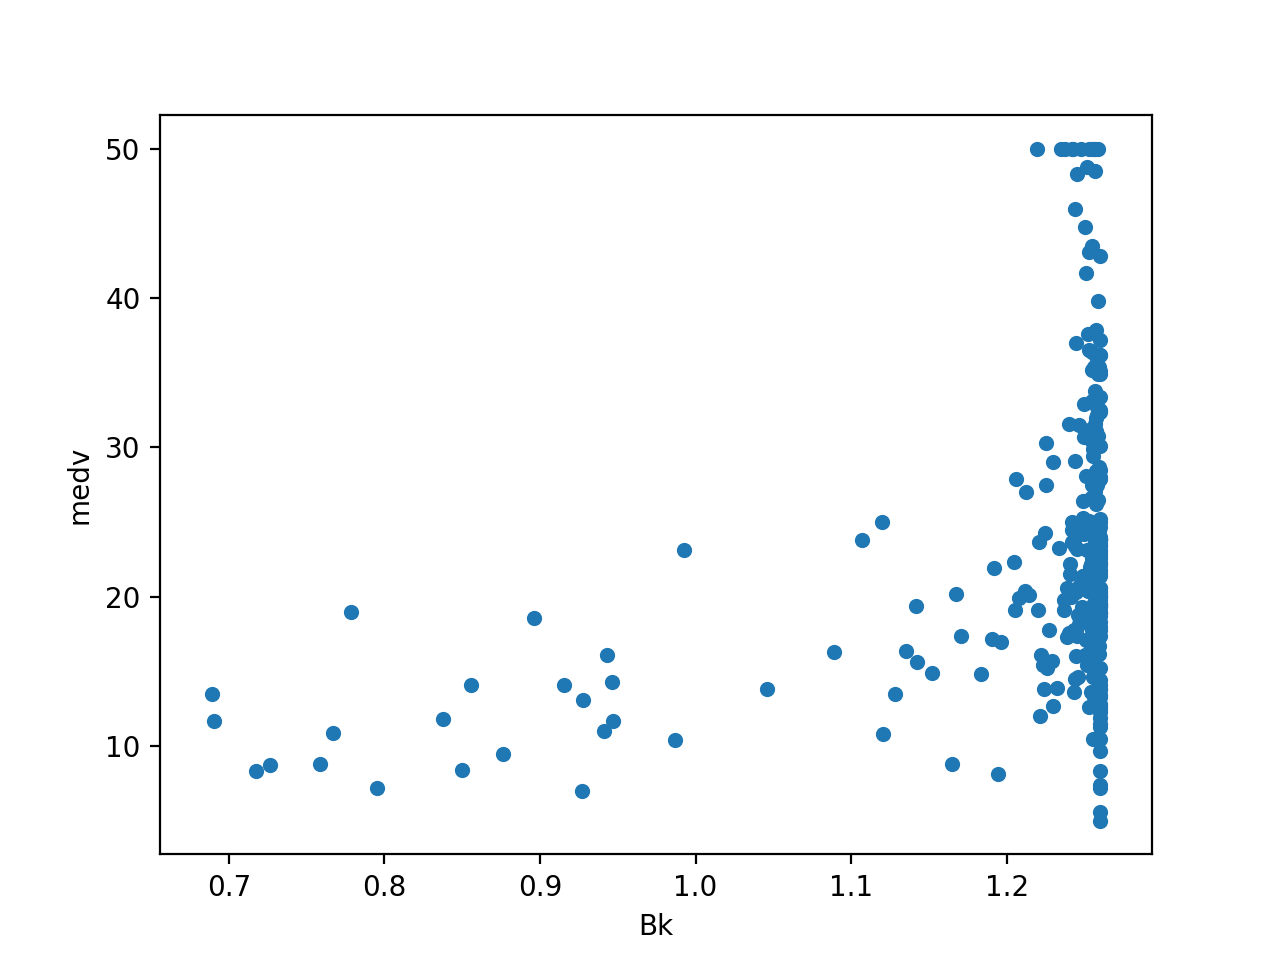

In [92]:
df.plot('Bk', 'medv', kind = 'scatter')

In [ ]:
graph teacher pupil ratio vs black proportion

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!